In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

import seaborn as sb

%matplotlib inline

In [12]:
def corpus(data):
    #data["noticia"] = data.titulo + " " + data.subTitulo + " " + data.conteudo
    data["noticia"] = data.titulo
    docs = []

    for index, doc in data.iterrows():
        doc.noticia = doc.noticia.lower()
        docs.append(doc.noticia)

    return docs

In [13]:
data = pd.read_csv("estadao_noticias_eleicao.csv", encoding = "utf-8")
data = data.replace(np.NAN, "")

In [14]:
corpus = corpus(data)

vectorizer = TfidfVectorizer()
vector = vectorizer.fit_transform(corpus)

x = vector.toarray() #Caracteristicas

In [15]:
# K-means
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(vector.toarray()) # passando as caracteristicas para o treinamento

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [16]:
len(kmeans.labels_) # grupos criados
kmeans.cluster_centers_ # centroides dos grupos

array([[ 5.78504024e-05,  8.29269940e-04,  2.22904306e-04, ...,
         4.64802249e-05,  5.85575103e-05,  2.05495905e-04],
       [-3.38813179e-20,  4.00180178e-04,  2.74694003e-04, ...,
         4.93971208e-04,  9.51289227e-04,  5.06864516e-18]])

In [17]:
from sklearn.manifold import TSNE
tsne_init = 'pca'  # could also be 'random'
tsne_perplexity = 20.0
tsne_early_exaggeration = 4.0
tsne_learning_rate = 1000
random_state = 1
model = TSNE(n_components=2, random_state=random_state, init=tsne_init, perplexity=tsne_perplexity,
         early_exaggeration=tsne_early_exaggeration, learning_rate=tsne_learning_rate)


transformed_v = model.fit_transform(vector.toarray())

In [18]:
df = pd.DataFrame(transformed_v, index = [i for i in range(len(transformed_v))], columns = ['x', 'y'] )

In [19]:
df['k-labels'] = kmeans.labels_
df

,x,y,k-labels
0,-4.180627,4.533615,0
1,-3.384115,6.357467,0
2,-5.598431,4.821393,0
3,-2.296531,3.536338,0
4,-2.296531,3.536338,0
5,-2.295537,3.535976,0
6,-2.254484,2.946688,1
7,-2.615424,6.093947,0
8,-2.296662,3.534900,0
9,-4.019473,2.496462,1


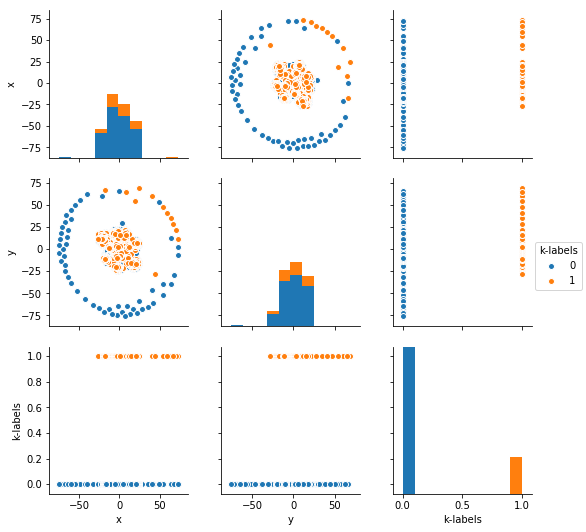

In [20]:
sb.pairplot(df,'k-labels')

In [22]:
from wordcloud import WordCloud

In [56]:
g0 = ''
g1 = ''
for i in range(len(kmeans.labels_)):
    if kmeans.labels_[i] == 0:
        g0 = g0 + ' ' + corpus[i]
    else:
        g1 = g1 + ' ' + corpus[i]

In [43]:
stopwords = stopwords.words('portuguese')

(-0.5, 399.5, 199.5, -0.5)

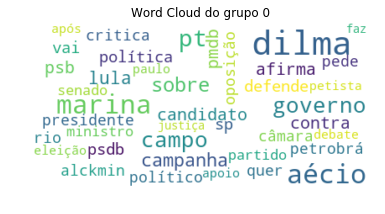

In [49]:
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=40, max_font_size=40).generate(g0)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Word Cloud do grupo 0')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

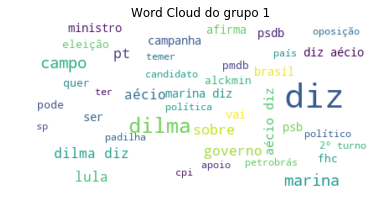

In [50]:
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=40, max_font_size=40).generate(g1)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Word Cloud do grupo 1')
plt.axis("off")

In [88]:
from collections import Counter
w1 = [w for w in g0.split(' ')]
f_g1 = Counter(w1)

del f_g1['']
for w in stopwords:
    del f_g1[w]

w2 = [w for w in g1.split(' ')]
f_g2 = Counter(w2)

del f_g2['']
for w in stopwords:
    del f_g2[w]

from operator import itemgetter
s1 = sorted(f_g1.items(), key=itemgetter(1), reverse = True)
s2 = sorted(f_g2.items(), key=itemgetter(1), reverse = True)

Text(0.5,1,'Palavras com a maior frequência no g0')

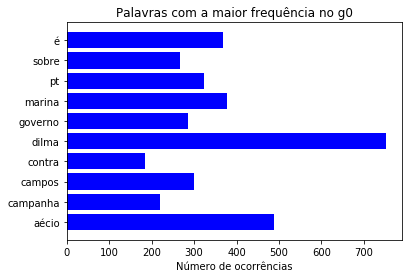

In [89]:
y = []
x = []
for i in s1[:10]:
    x.append(i[0])
    y.append(i[1])

plt.figure()
plt.barh(x, y, color="blue")
plt.xlabel("Número de ocorrências")
plt.title("Palavras com a maior frequência no g0" )

Text(0.5,1,'Palavras com a maior frequência no g1')

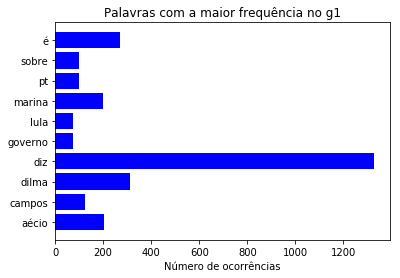

In [90]:
a = []
b = []
for i in s2[:10]:
    a.append(i[0])
    b.append(i[1])

plt.figure()
plt.barh(a, b, color="blue")
plt.xlabel("Número de ocorrências")
plt.title("Palavras com a maior frequência no g1" )